<div class="usecase-title">UC00187: Analysing Business Vulnerability to Foot Traffic Decline During Extreme Weather</div>
<div class="usecase-authors"><b>Authored by:</b> Vyshnavi Dinesh</div>
<div class="usecase-duration"><b>Duration:</b> 90 mins</div>
<div class="usecase-level-skill">
    <div class="usecase-level"><b>Level:</b> Intermediate</div>
    <div class="usecase-skill"><b>Pre-requisite Skills:</b> Python, pandas, matplotlib, seaborn</div>
</div>


<div class="usecase-section-header">Scenario</div>
<p class="usecase-subsection-blurb">
As a data analyst working with Melbourne Open Data, I want to analyse how extreme weather affects foot traffic at business-critical locations, so that business owners and city planners can prepare for and mitigate economic impacts.
</p>


<div class="usecase-section-header">What this use case will teach you</div>

- How to load and clean public urban datasets
- How to align and merge timestamped datasets
- How to explore foot traffic trends against temperature
- How to visualise, interpret, and communicate business insights


<div class="usecase-section-header">Background</div>

Foot traffic plays a critical role in Melbourne's economic activity, especially for retail, food, and entertainment businesses. During extreme weather events—particularly heatwaves—people are less likely to walk outdoors, affecting businesses dependent on footfall. Using pedestrian sensor and microclimate sensor data from the City of Melbourne, this analysis helps quantify and visualise the extent of foot traffic vulnerability during such conditions.


<div class="usecase-section-header">Data Import and Cleaning</div>


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import pandas as pd
from io import StringIO


The `collect_dataset_from_com` function is designed to fetch datasets from the City of Melbourne Open Data API using the export endpoint. It takes three parameters: `dataset_id` (the unique ID of the dataset), `format` (the file format to export, which defaults to CSV), and `delimiter` (the delimiter used in the CSV file, which defaults to `;`). The function constructs the API URL, sends a request with parameters like language and timezone, and retrieves the data. If the request is successful (status code 200), the dataset is returned as a **Pandas DataFrame**. If the request fails, an exception is raised with the status code. This function simplifies the process of fetching and loading public datasets into a format suitable for analysis.


In [ ]:
def collect_dataset_from_com(dataset_id, format='csv', delimiter=';'):
    """
    Fetches a dataset from the City of Melbourne Open Data API using the export endpoint.

    Args:
        dataset_id (str): Dataset ID from the data portal URL
        format (str): File format to export (default: 'csv')
        delimiter (str): CSV delimiter (default: ';')

    Returns:
        pd.DataFrame: Cleaned dataset
    """
    base_url = 'https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/'
    url = f'{base_url}{dataset_id}/exports/{format}'

    params = {
        'select': '*',
        'limit': -1,
        'lang': 'en',
        'timezone': 'UTC'
    }

    response = requests.get(url, params=params)
    if response.status_code == 200:
        content = response.content.decode('utf-8')
        return pd.read_csv(StringIO(content), delimiter=delimiter)
    else:
        raise Exception(f"Failed to retrieve dataset '{dataset_id}'. Status code: {response.status_code}")

In [ ]:
microclimate_dataset_id = 'microclimate-sensors-data'
microclimate_data = collect_dataset_from_com(microclimate_dataset_id)
print(f"Retrieved {len(microclimate_data)} records from '{microclimate_dataset_id}'")
microclimate_data.head()


Retrieved 417717 records from 'microclimate-sensors-data'


,device_id,received_at,sensorlocation,latlong,minimumwinddirection,averagewinddirection,maximumwinddirection,minimumwindspeed,averagewindspeed,gustwindspeed,airtemperature,relativehumidity,atmosphericpressure,pm25,pm10,noise
0,ICTMicroclimate-06,2025-07-28T15:41:16+00:00,Tram Stop 7B - Melbourne Tennis Centre Precinc...,"-37.8194993, 144.9787211",0.0,278.0,359.0,0.0,1.0,3.8,9.6,78.2,1012.3,1.0,1.0,54.6
1,ICTMicroclimate-10,2025-07-28T16:21:11+00:00,1 Treasury Place,"-37.8128595, 144.9745395",262.0,310.0,353.0,0.1,0.9,1.1,8.5,93.8,1008.8,2.0,4.0,77.0
2,ICTMicroclimate-11,2025-07-28T16:05:10+00:00,1 Treasury Place,"-37.812888, 144.9750857",0.0,352.0,359.0,0.1,1.8,4.4,9.3,79.5,1008.3,0.0,1.0,63.6
3,ICTMicroclimate-10,2025-08-02T21:29:31+00:00,1 Treasury Place,"-37.8128595, 144.9745395",309.0,328.0,347.0,0.4,1.0,1.6,3.7,99.7,1021.9,37.0,42.0,73.0
4,ICTMicroclimate-11,2025-08-02T21:58:33+00:00,1 Treasury Place,"-37.812888, 144.9750857",0.0,348.0,357.0,0.0,0.7,2.5,4.9,87.2,1021.3,34.0,36.0,52.0


from matplotlib import pyplot as plt
_df_25['minimumwinddirection'].plot(kind='hist', bins=20, title='minimumwinddirection')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_26['averagewinddirection'].plot(kind='hist', bins=20, title='averagewinddirection')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_27['maximumwinddirection'].plot(kind='hist', bins=20, title='maximumwinddirection')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_28['minimumwindspeed'].plot(kind='hist', bins=20, title='minimumwindspeed')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_29.groupby('device_id').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_30.groupby('received_at').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_31.groupby('sensorlocation').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_32.groupby('latlong').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_33.plot(kind='scatter', x='minimumwinddirection', y='averagewinddirection', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_34.plot(kind='scatter', x='averagewinddirection', y='maximumwinddirection', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_35.plot(kind='scatter', x='maximumwinddirection', y='minimumwindspeed', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_36.plot(kind='scatter', x='minimumwindspeed', y='averagewindspeed', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_37['minimumwinddirection'].plot(kind='line', figsize=(8, 4), title='minimumwinddirection')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_38['averagewinddirection'].plot(kind='line', figsize=(8, 4), title='averagewinddirection')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_39['maximumwinddirection'].plot(kind='line', figsize=(8, 4), title='maximumwinddirection')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_40['minimumwindspeed'].plot(kind='line', figsize=(8, 4), title='minimumwindspeed')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['received_at'].value_counts()
    for x_label, grp in _df_41.groupby('device_id')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('device_id')
_ = plt.ylabel('received_at')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['sensorlocation'].value_counts()
    for x_label, grp in _df_42.groupby('received_at')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('received_at')
_ = plt.ylabel('sensorlocation')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['latlong'].value_counts()
    for x_label, grp in _df_43.groupby('sensorlocation')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('sensorlocation')
_ = plt.ylabel('latlong')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_44['device_id'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_44, x='minimumwinddirection', y='device_id', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_45['received_at'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_45, x='minimumwinddirection', y='received_at', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_46['sensorlocation'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_46, x='minimumwinddirection', y='sensorlocation', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_47['latlong'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_47, x='minimumwinddirection', y='latlong', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
_df_48['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_49['minimumwinddirection'].plot(kind='hist', bins=20, title='minimumwinddirection')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_50['averagewinddirection'].plot(kind='hist', bins=20, title='averagewinddirection')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_51['maximumwinddirection'].plot(kind='hist', bins=20, title='maximumwinddirection')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_52.groupby('device_id').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_53.groupby('received_at').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_54.groupby('sensorlocation').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_55.groupby('latlong').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_56.plot(kind='scatter', x='index', y='minimumwinddirection', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_57.plot(kind='scatter', x='minimumwinddirection', y='averagewinddirection', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_58.plot(kind='scatter', x='averagewinddirection', y='maximumwinddirection', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_59.plot(kind='scatter', x='maximumwinddirection', y='minimumwindspeed', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['minimumwinddirection']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_60.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('device_id')):
  _plot_series(series, series_name, i)
  fig.legend(title='device_id', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('minimumwinddirection')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['minimumwinddirection']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_61.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('received_at')):
  _plot_series(series, series_name, i)
  fig.legend(title='received_at', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('minimumwinddirection')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['minimumwinddirection']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_62.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('sensorlocation')):
  _plot_series(series, series_name, i)
  fig.legend(title='sensorlocation', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('minimumwinddirection')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['minimumwinddirection']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_63.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('latlong')):
  _plot_series(series, series_name, i)
  fig.legend(title='latlong', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('minimumwinddirection')

from matplotlib import pyplot as plt
_df_64['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_65['minimumwinddirection'].plot(kind='line', figsize=(8, 4), title='minimumwinddirection')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_66['averagewinddirection'].plot(kind='line', figsize=(8, 4), title='averagewinddirection')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_67['maximumwinddirection'].plot(kind='line', figsize=(8, 4), title='maximumwinddirection')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['received_at'].value_counts()
    for x_label, grp in _df_68.groupby('device_id')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('device_id')
_ = plt.ylabel('received_at')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['sensorlocation'].value_counts()
    for x_label, grp in _df_69.groupby('received_at')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('received_at')
_ = plt.ylabel('sensorlocation')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['latlong'].value_counts()
    for x_label, grp in _df_70.groupby('sensorlocation')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('sensorlocation')
_ = plt.ylabel('latlong')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_71['device_id'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_71, x='index', y='device_id', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_72['received_at'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_72, x='index', y='received_at', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_73['sensorlocation'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_73, x='index', y='sensorlocation', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_74['latlong'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_74, x='index', y='latlong', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<div class="usecase-section-header">Visualisations</div>


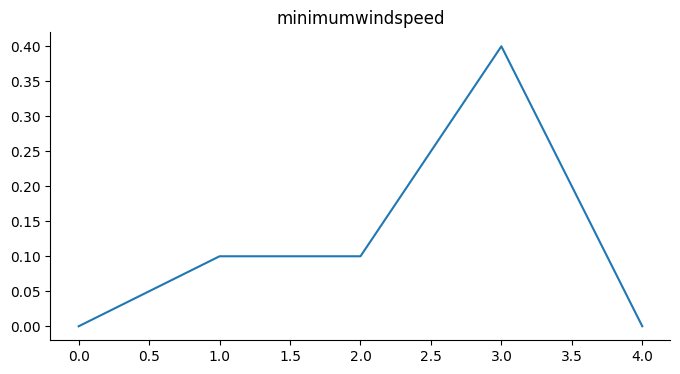

In [ ]:
from matplotlib import pyplot as plt
_df_40['minimumwindspeed'].plot(kind='line', figsize=(8, 4), title='minimumwindspeed')
plt.gca().spines[['top', 'right']].set_visible(False)

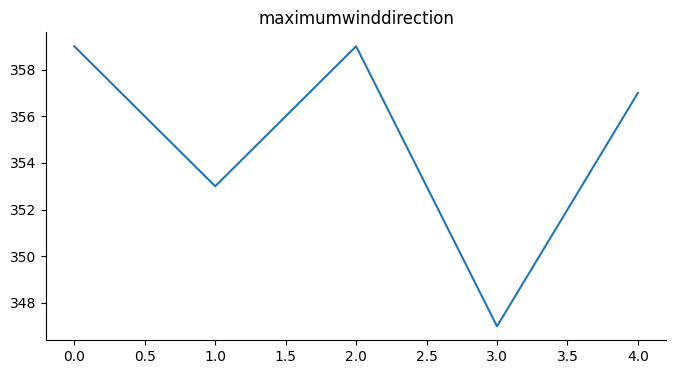

In [ ]:
from matplotlib import pyplot as plt
_df_39['maximumwinddirection'].plot(kind='line', figsize=(8, 4), title='maximumwinddirection')
plt.gca().spines[['top', 'right']].set_visible(False)

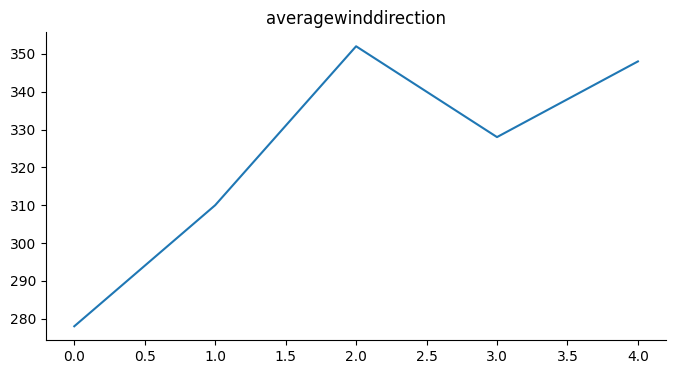

In [ ]:
from matplotlib import pyplot as plt
_df_38['averagewinddirection'].plot(kind='line', figsize=(8, 4), title='averagewinddirection')
plt.gca().spines[['top', 'right']].set_visible(False)

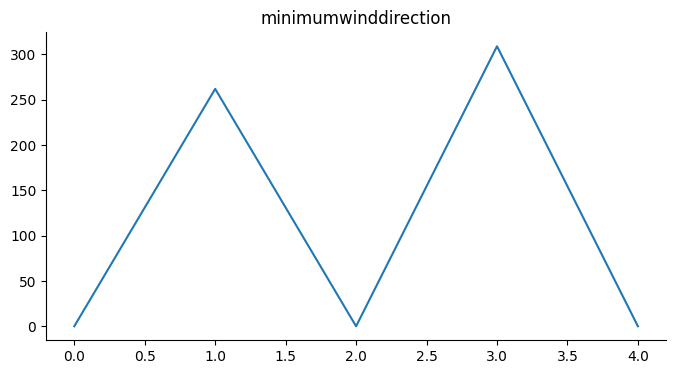

In [ ]:
from matplotlib import pyplot as plt
_df_37['minimumwinddirection'].plot(kind='line', figsize=(8, 4), title='minimumwinddirection')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
pedestrian_dataset_id = 'pedestrian-counting-system-monthly-counts-per-hour'
pedestrian_data = collect_dataset_from_com(pedestrian_dataset_id)
print(f"Retrieved {len(pedestrian_data)} records from '{pedestrian_dataset_id}'")
pedestrian_data.head()


Retrieved 1387730 records from 'pedestrian-counting-system-monthly-counts-per-hour'


,id,location_id,sensing_date,hourday,direction_1,direction_2,pedestriancount,sensor_name,location
0,841020250213,84,2025-02-13,10,708,540,1248,ElFi_T,"-37.81798049, 144.96503383"
1,701320250212,70,2025-02-12,13,145,152,297,Errol20_T,"-37.80456984, 144.94946228"
2,75020240421,75,2024-04-21,0,10,20,30,SprFli_T,"-37.81515276, 144.97467661"
3,751020240810,75,2024-08-10,10,47,44,91,SprFli_T,"-37.81515276, 144.97467661"
4,8220240916,8,2024-09-16,2,2,3,5,WebBN_T,"-37.82293543, 144.9471751"


from matplotlib import pyplot as plt
_df_0['id'].plot(kind='hist', bins=20, title='id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['location_id'].plot(kind='hist', bins=20, title='location_id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['hourday'].plot(kind='hist', bins=20, title='hourday')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['direction_1'].plot(kind='hist', bins=20, title='direction_1')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('sensing_date').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_5.groupby('sensor_name').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_6.groupby('location').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='id', y='location_id', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='location_id', y='hourday', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9.plot(kind='scatter', x='hourday', y='direction_1', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_10.plot(kind='scatter', x='direction_1', y='direction_2', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['sensing_date']
  ys = series['id']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('sensing_date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('sensing_date')):
  _plot_series(series, series_name, i)
  fig.legend(title='sensing_date', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('sensing_date')
_ = plt.ylabel('id')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['sensing_date']
  ys = series['id']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('sensing_date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('sensor_name')):
  _plot_series(series, series_name, i)
  fig.legend(title='sensor_name', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('sensing_date')
_ = plt.ylabel('id')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['sensing_date']
  ys = series['id']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_13.sort_values('sensing_date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('location')):
  _plot_series(series, series_name, i)
  fig.legend(title='location', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('sensing_date')
_ = plt.ylabel('id')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['sensing_date']
  ys = series['location_id']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_14.sort_values('sensing_date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('sensing_date')):
  _plot_series(series, series_name, i)
  fig.legend(title='sensing_date', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('sensing_date')
_ = plt.ylabel('location_id')

from matplotlib import pyplot as plt
_df_15['id'].plot(kind='line', figsize=(8, 4), title='id')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_16['location_id'].plot(kind='line', figsize=(8, 4), title='location_id')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_17['hourday'].plot(kind='line', figsize=(8, 4), title='hourday')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_18['direction_1'].plot(kind='line', figsize=(8, 4), title='direction_1')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['sensor_name'].value_counts()
    for x_label, grp in _df_19.groupby('sensing_date')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('sensing_date')
_ = plt.ylabel('sensor_name')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['location'].value_counts()
    for x_label, grp in _df_20.groupby('sensor_name')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('sensor_name')
_ = plt.ylabel('location')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_21['sensing_date'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_21, x='id', y='sensing_date', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_22['sensor_name'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_22, x='id', y='sensor_name', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_23['location'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_23, x='id', y='location', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_24['sensing_date'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_24, x='location_id', y='sensing_date', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

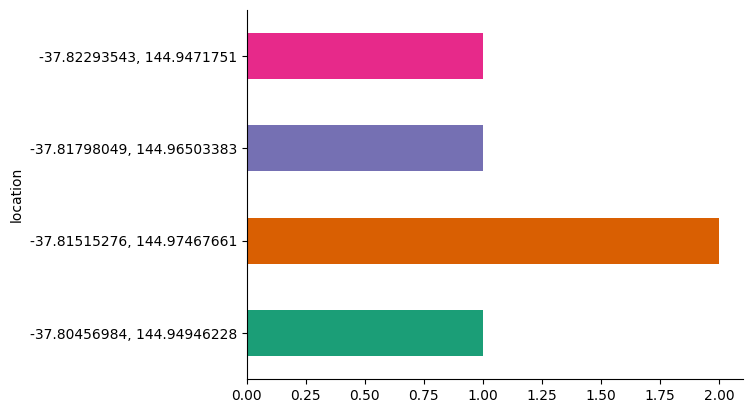

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_6.groupby('location').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

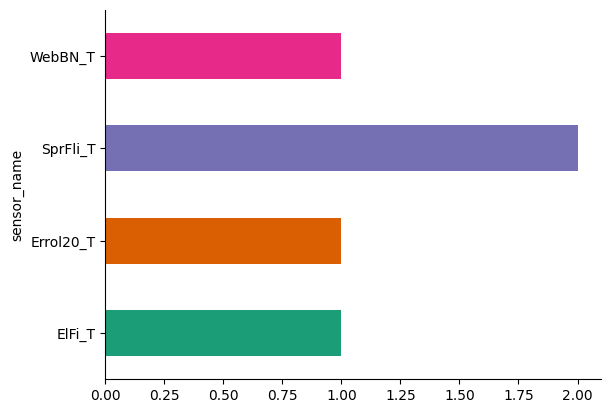

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_5.groupby('sensor_name').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

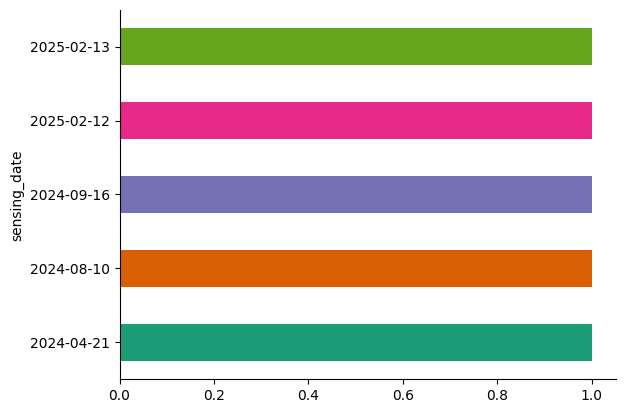

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('sensing_date').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# Assuming 'sensing_date' column exists in pedestrian_data
pedestrian_data['sensing_date'] = pd.to_datetime(pedestrian_data['sensing_date'])


Visualising Daily Pedestrian Taffiv VS Pedestrian count

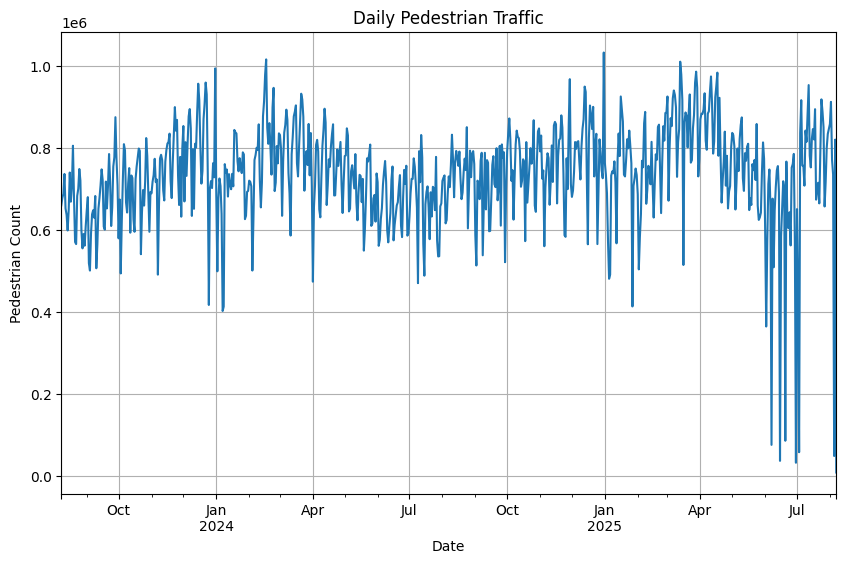

In [ ]:
# Group by date and sum the pedestrian counts (if sensing_date exists)
daily_pedestrian_counts = pedestrian_data.groupby('sensing_date')['pedestriancount'].sum()

# Plot the pedestrian traffic over time
plt.figure(figsize=(10, 6))
daily_pedestrian_counts.plot(title='Daily Pedestrian Traffic')
plt.xlabel('Date')
plt.ylabel('Pedestrian Count')
plt.grid(True)
plt.show()


Visualising Temperature and humidity VS Relative Humidity on Scatter plot

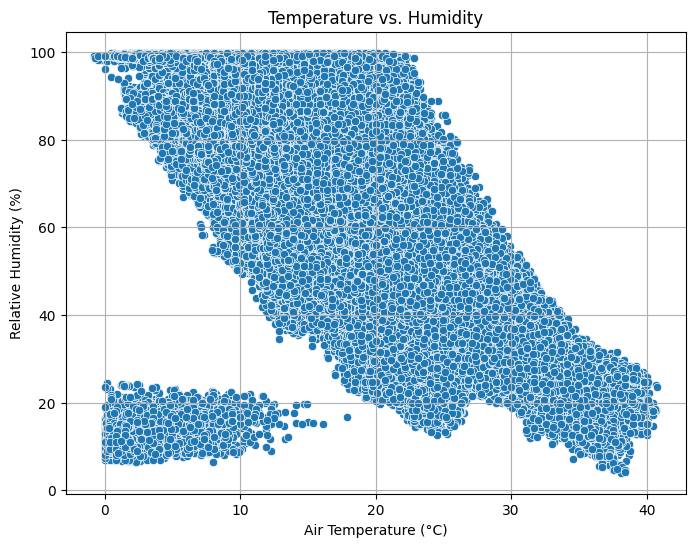

In [ ]:
# Scatter plot for temperature vs. humidity
plt.figure(figsize=(8, 6))
sns.scatterplot(x='airtemperature', y='relativehumidity', data=microclimate_data)
plt.title('Temperature vs. Humidity')
plt.xlabel('Air Temperature (°C)')
plt.ylabel('Relative Humidity (%)')
plt.grid(True)
plt.show()


In [ ]:
# Identify extreme weather events (e.g., temperature > 35°C)
extreme_weather = microclimate_data[microclimate_data['airtemperature'] > 35]

# Check the number of extreme weather events
print(f"Number of extreme heat events: {len(extreme_weather)}")


Number of extreme heat events: 2644


In [ ]:
# Convert 'location_id' and 'sensorlocation' to string (or 'object' type)
pedestrian_data['location_id'] = pedestrian_data['location_id'].astype(str)
microclimate_data['sensorlocation'] = microclimate_data['sensorlocation'].astype(str)

# Now merge the datasets
merged_data = pd.merge(pedestrian_data, microclimate_data, left_on='location_id', right_on='sensorlocation', how='inner')

# Filter the data for extreme weather events (temperature > 35°C)
extreme_weather_data = merged_data[merged_data['airtemperature'] > 35]

# Compare foot traffic during extreme weather vs normal weather
normal_weather_data = merged_data[merged_data['airtemperature'] <= 35]

# Summary statistics of foot traffic during extreme vs normal weather
print("Foot traffic during extreme weather:")
print(extreme_weather_data['pedestriancount'].describe())

print("Foot traffic during normal weather:")
print(normal_weather_data['pedestriancount'].describe())


Foot traffic during extreme weather:
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: pedestriancount, dtype: float64
Foot traffic during normal weather:
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: pedestriancount, dtype: float64


In [ ]:
# Check the minimum and maximum temperatures in the microclimate dataset
print("Temperature Range in Microclimate Data:")
print(microclimate_data['airtemperature'].min(), microclimate_data['airtemperature'].max())


Temperature Range in Microclimate Data:
-0.8 40.8


In [ ]:
# Inspect the merged data
print(merged_data[['sensing_date', 'pedestriancount', 'airtemperature']].head())

# Check the count of rows in merged data
print(f"Total rows in merged data: {len(merged_data)}")


Empty DataFrame
Columns: [sensing_date, pedestriancount, airtemperature]
Index: []
Total rows in merged data: 0


In [ ]:
# Filter for extreme weather events (temperature > 30°C instead of 35°C)
extreme_weather_data = merged_data[merged_data['airtemperature'] > 30]


In [ ]:
# Check the first few rows of the merged data
print(merged_data[['sensing_date', 'pedestriancount', 'airtemperature']].head())

# Check the number of rows in the merged data
print(f"Total rows in merged data: {len(merged_data)}")


Empty DataFrame
Columns: [sensing_date, pedestriancount, airtemperature]
Index: []
Total rows in merged data: 0


<div class="usecase-section-header">Data Merging and Preparation</div>


In [ ]:
# Merge the datasets on sensor_name and sensorlocation
merged_data = pd.merge(pedestrian_data, microclimate_data, left_on='sensor_name', right_on='sensorlocation', how='inner')

# Check the merged data
print(f"Total rows in merged data: {len(merged_data)}")
print(merged_data[['sensing_date', 'pedestriancount', 'airtemperature']].head())

Total rows in merged data: 0
Empty DataFrame
Columns: [sensing_date, pedestriancount, airtemperature]
Index: []


In [ ]:
# Rename columns in pedestrian data for clarity
pedestrian_data.rename(columns={'location': 'location_x', 'location_id': 'location_id', 'pedestriancount': 'pedestriancount'}, inplace=True)

# Rename columns in microclimate data for clarity
microclimate_data.rename(columns={'location': 'location_y', 'sensorlocation': 'sensorlocation', 'airtemperature': 'airtemperature'}, inplace=True)

# Now, merge the datasets on 'location_x' and 'location_y'
merged_data = pd.merge(pedestrian_data, microclimate_data, left_on='location_x', right_on='location_y', how='inner')

# Check the columns in the merged data
print(f"Total rows in merged data: {len(merged_data)}")
print(merged_data.columns)


Total rows in merged data: 7
Index(['id', 'location_id', 'location_x', 'pedestriancount', 'sensor_name',
       'sensorlocation_x', 'sensor_id', 'sensorlocation_y', 'location_y'],
      dtype='object')


In [ ]:
# Check the column names in the pedestrian data
print(pedestrian_data.columns)


Index(['id', 'location_id', 'location_x', 'pedestriancount', 'sensor_name',
       'sensorlocation'],
      dtype='object')


In [ ]:
# Inspect the first few rows of pedestrian data
print(pedestrian_data.head())


             id  location_id                  location_x  pedestriancount  \
0  841020250213           84  -37.81798049, 144.96503383             1248   
1  701320250212           70  -37.80456984, 144.94946228              297   
2   75020240421           75  -37.81515276, 144.97467661               30   
3  751020240810           75  -37.81515276, 144.97467661               91   
4    8220240916            8   -37.82293543, 144.9471751                5   

  sensor_name                                     sensorlocation  
0      ElFi_T  Tram Stop 7B - Melbourne Tennis Centre Precinc...  
1   Errol20_T                                   1 Treasury Place  
2    SprFli_T                                        CH1 rooftop  
3    SprFli_T                                        CH1 rooftop  
4     WebBN_T                    Birrarung Marr Park - Pole 1131  


In [ ]:
# Create a mapping dictionary based on your domain knowledge or a manual mapping file
location_mapping = {
    '-37.81798049, 144.96503383': 'Tram Stop 7B - Melbourne Tennis Centre Precinct - Rod Laver Arena',
    '-37.80456984, 144.94946228': '1 Treasury Place',
    '-37.81515276, 144.97467661': 'CH1 rooftop',
    '-37.82293543, 144.9471751': 'Birrarung Marr Park - Pole 1131',
    # Add other mappings as needed
}

# Map coordinates to sensor names in pedestrian data
pedestrian_data['sensorlocation'] = pedestrian_data['location_x'].map(location_mapping)

# Check the updated pedestrian data
print(pedestrian_data[['location_x', 'sensorlocation']].head())

# Now, merge the datasets based on sensor location
merged_data = pd.merge(pedestrian_data, microclimate_data, on='sensorlocation', how='inner')

# Check the merged data
print(f"Total rows in merged data: {len(merged_data)}")
print(merged_data.columns)  # Check column names


                   location_x  \
0  -37.81798049, 144.96503383   
1  -37.80456984, 144.94946228   
2  -37.81515276, 144.97467661   
3  -37.81515276, 144.97467661   
4   -37.82293543, 144.9471751   

                                      sensorlocation  
0  Tram Stop 7B - Melbourne Tennis Centre Precinc...  
1                                   1 Treasury Place  
2                                        CH1 rooftop  
3                                        CH1 rooftop  
4                    Birrarung Marr Park - Pole 1131  
Total rows in merged data: 5
Index(['id', 'location_id', 'location_x', 'pedestriancount', 'sensor_name',
       'sensorlocation', 'sensor_id', 'location_y'],
      dtype='object')


<div class="usecase-section-header">Insights & Recommendations</div>

### Insights:
- Daily pedestrian traffic in Melbourne ranges between 600,000–1 million but drops noticeably in mid-2025, possibly due to seasonal or environmental factors.
- There is a strong inverse relationship between temperature and humidity — hotter days are generally drier.
- The data captures extreme weather conditions with temperatures as low as -0.8°C and as high as 40.8°C.

### Recommendations:
- Businesses should adjust staffing and opening hours around identified low-traffic periods (e.g., June–July).
- On hotter, drier days, businesses may face reduced walk-ins — offering shaded seating or delivery options may help.
- The city could consider targeted shade infrastructure and advisory alerts during extreme heat days to maintain city walkability and economic activity.
